## **Notebook PC#03**
## Regularized ELM Classifier for the MNIST and CIFAR-10 database. Designed from scratch.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Beatriz Akiria de Assis Quaresma - 203899 <br>
**Aluno(a):** Decio Miranda Filho - 236087

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)
X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (10000, 784)
Shape of yt:  (10000,)


In [ ]:
# Dataset balancing analysis
from tensorflow.keras.utils import to_categorical
import plotly.express as px

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)
fig1 = px.bar(x=range(10),y=sum_along_columns1, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the training dataset</b>")
fig1.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig1.show()
fig2 = px.bar(x=range(10),y=sum_along_columns2, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the test dataset</b>")
fig2.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig2.show()

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


In [ ]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

# ELM X
# We will concatenate a column of 1's to account for the V0 of each hidden neuron later on
X_training_elm = np.concatenate((np.transpose(np.array([np.ones(X_training.shape[0])])), X_training), axis=1)
X_validation_elm = np.concatenate((np.transpose(np.array([np.ones(X_validation.shape[0])])), X_validation), axis=1)

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

print("X_training_elm:".ljust(20), X_training_elm.shape)
print("X_validation_elm:".ljust(20), X_validation_elm.shape)

X_training:          (42000, 784)
y_training:          (42000, 10)
X_validation:        (18000, 784)
y_validation:        (18000, 10)
X_training_elm:      (42000, 785)
X_validation_elm:    (18000, 785)


In [ ]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_

In [ ]:
def leaky_relu(table):
    return np.where(table > 0, table,  0.02 * table)

def relu(table):
    return np.where(table > 0, table,  0)

def get_h(X, V, activation_function):
    V_ = np.matmul(X, V)
    return activation_function(V_)

def get_w(X, y, c):
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w

In [ ]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []

    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)

        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [ ]:
# Standard deviation of the random weight generation at the hidden layer
sigma = 0.2
# Number of inputs for the MNIST dataset: 785
# Take 1000 hidden neurons for the MNIST dataset
V  = sigma * np.random.randn(785, 1000)

In [ ]:
c_values = [pow(2,d) for d in range(-16, 15, 2)] # Range goes up to 15 to ensure search up to 2^14

hit_rates_training, Ws = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, c_values)

1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, c_values, Ws)

1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384


Best c value: 4 
Performance of this value: 0.9407222222222222


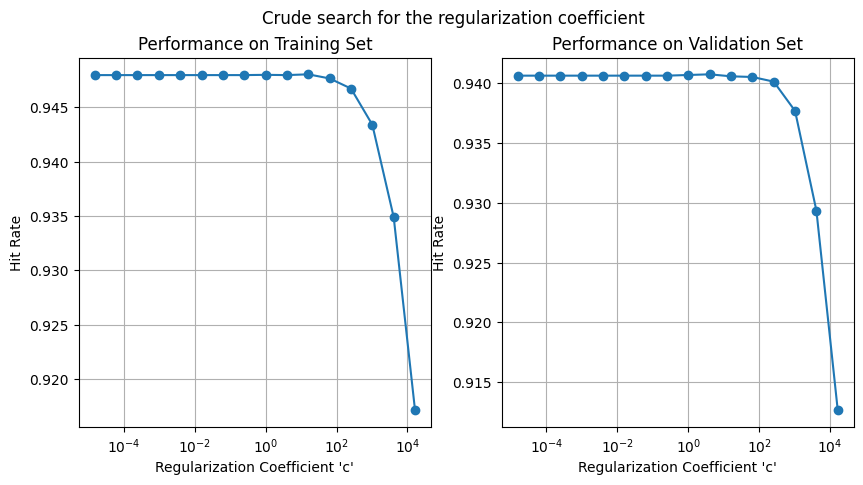

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training Set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation Set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))


**Nota**: Ao analisar o gráfico da direita acima, só corrija o intervalo de busca caso não haja uma queda de desempenho para valores elevados do coeficiente de regularização. Caso o melhor coeficiente de regularização seja o de menor valor, siga adiante, pois isso indica a ausência de necessidade de regularizar esta solução.

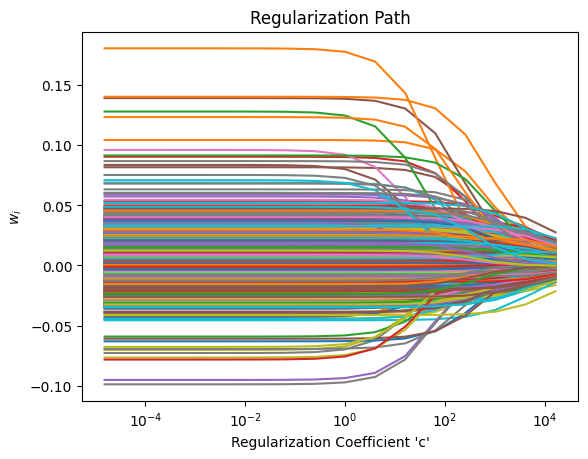

In [ ]:
lambd_values = c_values
w_values = Ws

def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"Regularization Coefficient 'c'", fontsize=10)
    plt.ylabel(r"$w_i$", fontsize=10)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, w_values)

<font color="green">
Atividade (a) <br>
Explique o comportamento das curvas [Regularization Path] e [Performance on Validation Set] logo acima, vinculando os seus comportamentos. <br>
</font>

**Resposta:**

Analisando as curvas, é possível observar que a partir do momento que o coeficiente de regularização $c$ cresce mais do que $10^2$, a *performance* no conjunto de validação cai abruptamente e os coeficientes $w_i$ se aproximam de $0$ no *Regularization Path*. Isso acontece porque a regularização está exercendo uma forte influência na redução do tamanho dos coeficientes do modelo, isto é, o aumento da regularização penaliza os coeficientes maiores, forçando-os a se aproximarem de zero. Consequentemente, o modelo se torna mais simples, com menos coeficientes contribuindo para a previsão final, o que pode levar a uma perda de capacidade de generalização e desempenho nos dados de validação.

In [ ]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, fine_c_values)

1.0
2.5
4.0
5.5
7.0
8.5
10.0
11.5
13.0
14.5
16.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, fine_c_values, Ws_fine)

1.0
2.5
4.0
5.5
7.0
8.5
10.0
11.5
13.0
14.5
16.0


Best c value: 2.5 
Performance of this value: 0.9407222222222222


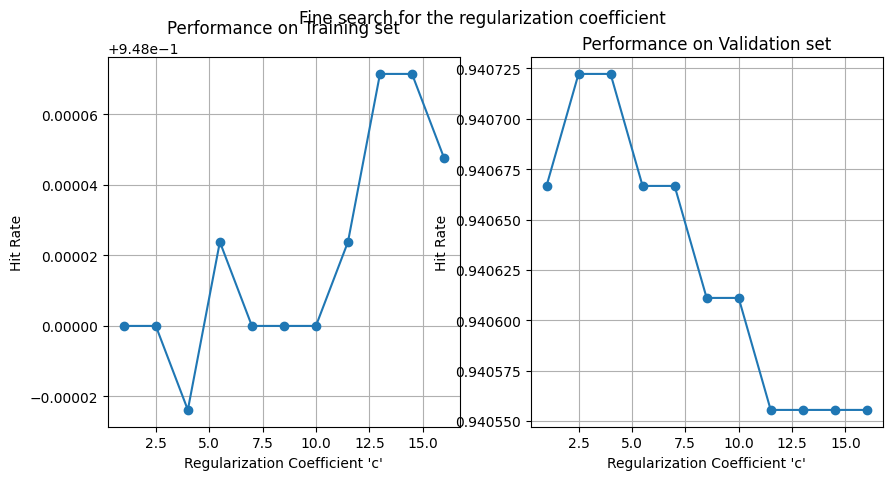

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
X_elm = np.concatenate((np.transpose(np.array([np.ones(X.shape[0])])), X), axis=1)
W_elm = get_w(get_h(X_elm, V, relu), yy, best_c)

In [ ]:
Xt_elm = np.concatenate((np.transpose(np.array([np.ones(Xt.shape[0])])), Xt), axis=1)
yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
confusion_matrix_df = pd.DataFrame(confusion_matrix)
confusion_matrix_df

Performance on test set: 0.9441


,0,1,2,3,4,5,6,7,8,9
0,958,0,6,0,2,6,6,4,5,9
1,1,1122,2,1,3,2,3,15,3,7
2,0,2,957,13,5,3,3,18,6,0
3,0,2,12,945,0,21,0,1,16,12
4,0,1,6,1,918,2,8,5,10,26
5,3,1,3,17,0,830,9,3,15,6
6,7,3,8,1,10,13,925,0,12,0
7,2,1,12,12,3,1,2,963,7,10
8,9,3,25,14,3,9,2,3,892,8
9,0,0,1,6,38,5,0,16,8,931


<font color="green">
Atividade (b) <br>
O que sustenta o ganho de desempenho na taxa de acerto de classificação quando comparado ao classificador linear do PC01? Repare que a estratégia de otimização é a mesma nos dois casos. <br>
</font>

**Resposta:**

Mesmo ambos utilizando a mesma estratégia de otimização, o classificador do PC03 empregou o método ELM (Extreme Learning Machine ou Aprendizado de máquina extremo). Com essa abordagem, treinou-se a rede neural do tipo *Perceptron* com os pesos da camada iniciados com valores aleatórios, exceto da camada de saída, e ao mesmo tempo utilizou-se a regularização com penalização dos pesos. Dessa forma, a camada intermediária da ELM produz um mapemamento não linear e ajuda a linearizar o problema para a camada de saída. Uma vez que a camada de saída utiliza um classificador linear, o uso da camada intermediária para linearizar o problema melhora o desempenho da classificação.

Image no. 63


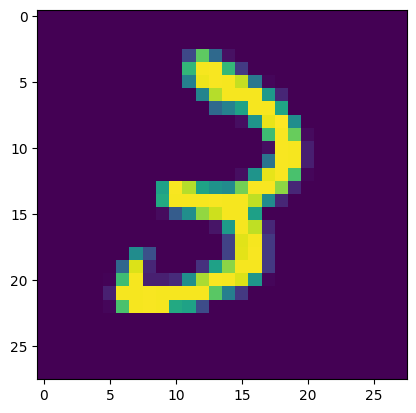

Real: 3
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.05180991  0.06101951  0.53876049  0.29922447 -0.02027118  0.05608064
 -0.10913123 -0.02499602 -0.0514502   0.20702276] 

Image no. 73


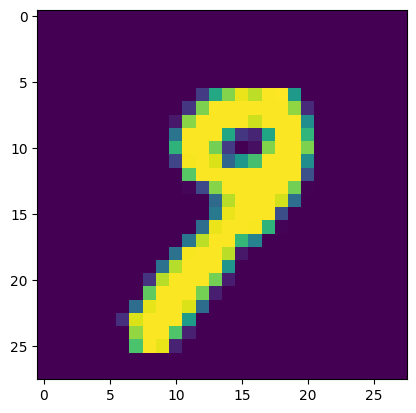

Real: 9
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.00672479  0.0859717  -0.10343953  0.07620717  0.05923831 -0.04107359
  0.00206332  0.30436884  0.37254697  0.32417003] 

Image no. 115


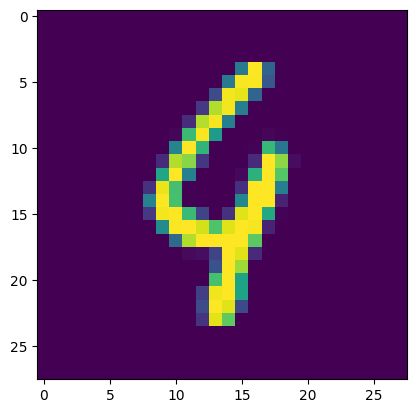

Real: 4
Predicted: 9
Rank of the correct answer: 2
Probabilities: [-0.03931275  0.00111248 -0.04400328 -0.00120169  0.39266999 -0.10685328
  0.23090264  0.00788706  0.12230642  0.44623834] 

Image no. 151


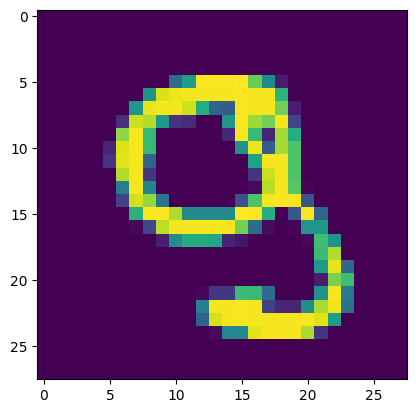

Real: 9
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.03025952 -0.04870561  0.12356669  0.15929082  0.12111073  0.16694979
 -0.18610933 -0.00943045  0.33692458  0.2815101 ] 

Image no. 167


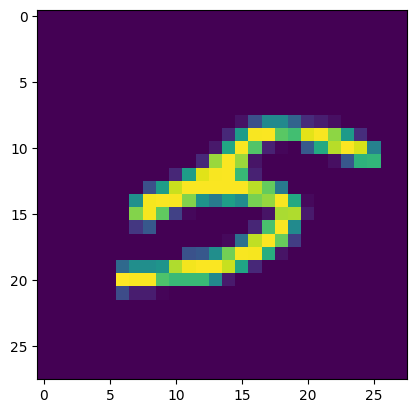

Real: 5
Predicted: 4
Rank of the correct answer: 4
Probabilities: [ 0.18514787 -0.03268429  0.00737228  0.11988603  0.23681666  0.16775189
  0.15769135 -0.02543026  0.22398374 -0.0590889 ] 

Image no. 193


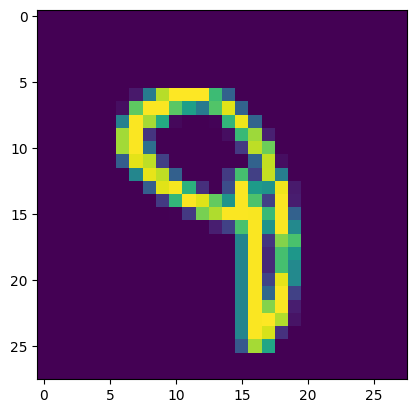

Real: 9
Predicted: 4
Rank of the correct answer: 3
Probabilities: [ 0.01587221  0.05003905 -0.02491393  0.14685192  0.31785652 -0.0414015
  0.00491893  0.05411913  0.25117472  0.2106675 ] 



In [ ]:
# Devoted solely to the MNIST dataset
def find_pos(item, lst):
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z]
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")

##Repetindo os principais passos, agora para a base CIFAR-10.

In [ ]:
from keras.datasets import cifar10

(Xp, y), (Xtp, yt) = cifar10.load_data()
Xa = Xp.reshape(Xp.shape[0], 3072)
Xta = Xtp.reshape(Xtp.shape[0], 3072)
y = y.ravel()
yt = yt.ravel()
X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

yy = to_categorical(y)
yyt = to_categorical(yt)

170498071/170498071 [==============================] - 3s 0us/step
Shape of X:  (50000, 3072)
Shape of y:  (50000,)
Shape of Xt:  (10000, 3072)
Shape of yt:  (10000,)


In [ ]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

# ELM X
# We will concatenate a column of 1's to account for the V0 of each hidden neuron later on
X_training_elm = np.concatenate((np.transpose(np.array([np.ones(X_training.shape[0])])), X_training), axis=1)
X_validation_elm = np.concatenate((np.transpose(np.array([np.ones(X_validation.shape[0])])), X_validation), axis=1)

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

print("X_training_elm:".ljust(20), X_training_elm.shape)
print("X_validation_elm:".ljust(20), X_validation_elm.shape)

X_training:          (35000, 3072)
y_training:          (35000, 10)
X_validation:        (15000, 3072)
y_validation:        (15000, 10)
X_training_elm:      (35000, 3073)
X_validation_elm:    (15000, 3073)


In [ ]:
# Standard deviation of the random weight generation at the hidden layer
sigma = 0.2
# Number of inputs for the CIFAR10 dataset: 3073
# Take 2000 hidden neurons for the CIFAR10 dataset.
V  = sigma * np.random.randn(3073, 2000)

In [ ]:
c_values = [pow(2,d) for d in range(-8, 21, 2)] # Range goes up to 21 to ensure search up to 2^20

hit_rates_training, Ws = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, c_values)

0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, c_values, Ws)

0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576


Best c value: 4096 
Performance of this value: 0.4628


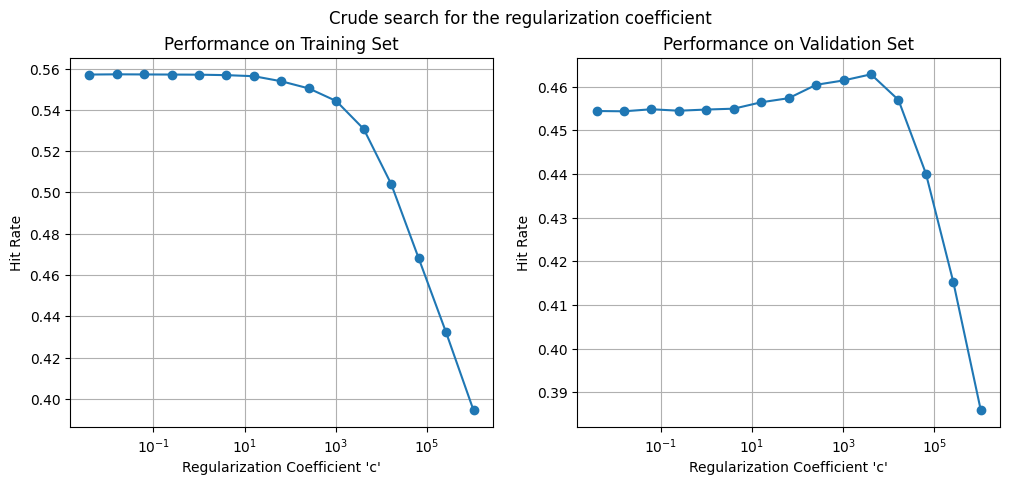

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training Set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation Set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))


**Nota**: Ao analisar o gráfico da direita acima, só corrija o intervalo de busca caso não haja uma queda de desempenho para valores elevados do coeficiente de regularização. Caso o melhor coeficiente de regularização seja o de menor valor, siga adiante, pois isso indica a ausência de necessidade de regularizar esta solução.

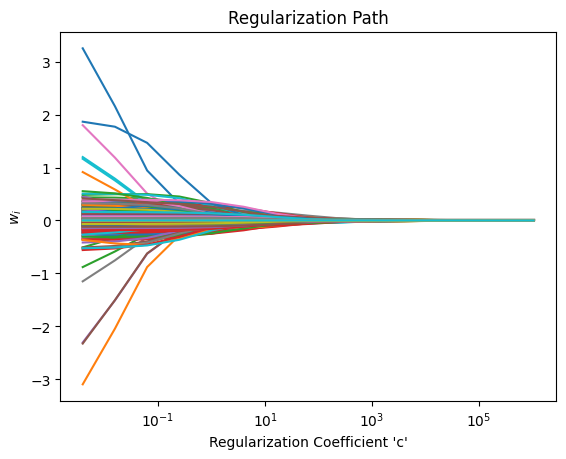

In [ ]:
lambd_values = c_values
w_values = Ws

def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"Regularization Coefficient 'c'", fontsize=10)
    plt.ylabel(r"$w_i$", fontsize=10)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, w_values)

In [ ]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, fine_c_values)

1024.0
2560.0
4096.0
5632.0
7168.0
8704.0
10240.0
11776.0
13312.0
14848.0
16384.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, fine_c_values, Ws_fine)

1024.0
2560.0
4096.0
5632.0
7168.0
8704.0
10240.0
11776.0
13312.0
14848.0
16384.0


Best c value: 2560.0 
Performance of this value: 0.4634666666666667


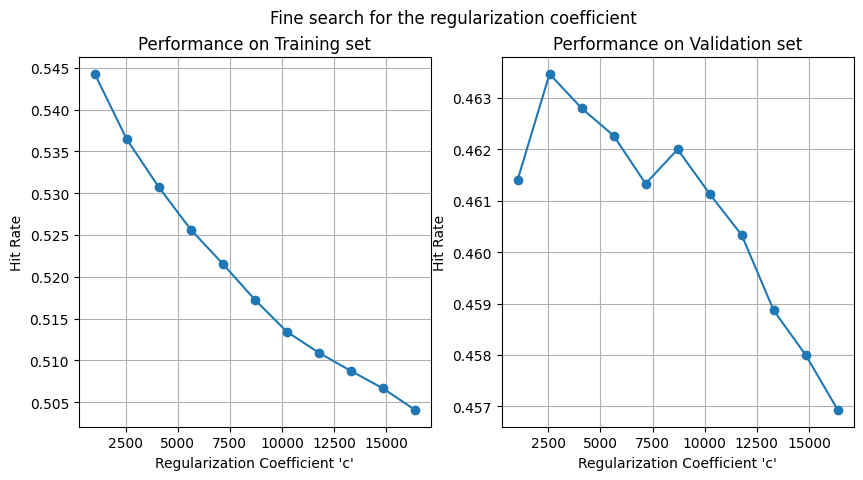

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
X_elm = np.concatenate((np.transpose(np.array([np.ones(X.shape[0])])), X), axis=1)
W_elm = get_w(get_h(X_elm, V, relu), yy, best_c)

In [ ]:
Xt_elm = np.concatenate((np.transpose(np.array([np.ones(Xt.shape[0])])), Xt), axis=1)
yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
confusion_matrix_df = pd.DataFrame(confusion_matrix)
confusion_matrix_df

Performance on test set: 0.4631


,0,1,2,3,4,5,6,7,8,9
0,532,45,110,48,69,30,21,37,106,39
1,48,586,42,56,29,35,36,44,71,183
2,42,7,289,67,123,81,85,49,10,19
3,12,25,62,253,43,151,54,40,14,22
4,23,9,121,51,364,82,86,64,16,11
5,15,15,76,193,57,336,57,67,25,18
6,26,25,139,147,144,104,570,44,13,34
7,51,53,91,65,104,97,41,527,26,56
8,194,72,39,45,44,44,23,41,650,94
9,57,163,31,75,23,40,27,87,69,524


<font color="green">
Atividade (c) <br>
No link a seguir, afirma-se que uma das vantagens das ELMs é que elas [can learn from the training data in one step, without repeating the learning process in multiple steps.] Não foi o que fizemos neste PC03. Qual é o risco de treinar uma ELM em apenas um passo? <br>
</font>

[Extreme Learning Machine - Advantage of ELM](https://www.geeksforgeeks.org/extreme-learning-machine/)

**Resposta:**

O risco de treinar uma ELM em apenas um passo é que o modelo pode se ajustar excessivamente aos dados de treinamento, isto é, pode ocorrer *overfitting*. Consequentemente, o modelo pode ter uma baixa capacidade de generalização para dados inéditos (não vistos no treino). Como as ELMs têm uma capacidade de ajuste muito alta devido à sua estrutura simples e grande número de neurônios na camada oculta, elas podem facilmente memorizar os dados de treinamento, mesmo que sejam ruídos ou padrões irrelevantes. Além disso, treinar uma ELM em um único passo pode tornar o modelo sensível a variações nos dados de treinamento, especialmente se o conjunto de dados for pequeno ou desbalanceado. Isso pode levar a resultados instáveis e menos confiáveis quando o modelo é aplicado a novos conjuntos de dados.


<font color="green">
Atividade (d) <br>
Uma vez treinada uma ELM, que estratégia você adotaria para eliminar neurônios da camada intermediária, caso uma implementação prática indicasse uma limitação de memória? A sua resposta deve propor uma subrede ELM extraída da rede ELM completa já treinada, capaz de exibir máximo desempenho de generalização. Considere que o número de neurônios que precisam ser eliminados é uma porcentagem arbitrária do número total. Considere também que a sua estratégia não deve se basear na amplitude dos pesos individuais da camada de saída (essa seria uma estratégia possível, mas não deve ser adotada aqui). <br>
</font>

**Resposta:**

Uma estratégia viável para identificar e eliminar neurônios menos relevantes na camada intermediária da rede ELM é realizar o produto ortogonal entre as colunas da matriz $H$ (cada coluna da matriz contém a função de ativação de um neurônio para todos os padrões de entrada do problema, exceto a primeira coluna que é de $1's$, para determinar os bias), como descrito na página 76 do Tópico 4. Isso permite medir a correlação entre as funções de ativação de cada neurônio. Se os valores resultantes estiverem próximos de zero, indica que essas funções de ativação têm uma correlação baixa entre si, sugerindo que os neurônios correspondentes têm uma baixa ativação e contribuição limitada na representação dos padrões de entrada. Portanto, esses neurônios podem ser considerados candidatos para remoção da camada intermediária.

_________________________________________________________________________

Analogamente, utilizar algum algoritmo de redução de dimensionalidade - como o PCA (Prinicipal Componente Analsysis) - de modo que reduza a dimensão dessa matriz e que elimine informação redundante (colunas altamente correlacionadas que apontem para direções próximas). Desse modo, obtém-se uma matriz mais leve para a memória e preservando parte da informação necessária.